# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrUa-2020-07-14.zip
unzip autoriaNumberplateOcrUa-2020-07-14.zip
mv autoriaNumberplateOcrUa-2020-07-14 ua
```
or use your own dataset.

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "ua"
VERSION = "2020_08_26_tensorflow_v2"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [2]:
class eu_ua_2004_2015(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        
        self.EPOCHS = 3

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'H', '5', 'K', 'B', 'X', 'O', '3', '7', 'T', 'A', '1', '4', '0', 'M', '2', '6', '9', 'C', 'E', 'P', 'I', '8'}
Letters val  {'H', '5', 'K', 'B', 'X', 'O', '3', '7', 'T', 'A', '1', '4', '0', 'M', '2', '6', '9', 'C', 'E', 'P', 'I', '8'}
Letters test  {'H', '5', 'K', 'B', 'X', 'O', '3', '7', 'T', 'A', '1', '4', '0', 'M', '2', '9', '6', 'C', 'E', 'P', 'I', '8'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


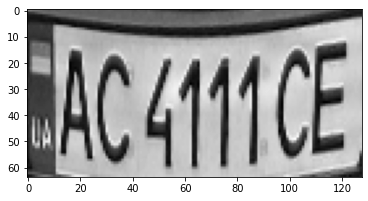

2) the_labels (plate number): AC4111CE is encoded as [10, 12, 4, 1, 1, 1, 12, 13]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED


In [12]:
ocrTextDetector = eu_ua_2004_2015()
model = ocrTextDetector.prepare(PATH_TO_DATASET)

In [5]:
model = ocrTextDetector.train(is_random=1)


START TRAINING
Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu_ua_2004_2015 (Inpu [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu_ua_2004_2015[0][0]  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
_______________________________________________________________________

In [6]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 BC1210AT
True: 			 BC1210AM

Predicted: 		 AC23228BE
True: 			 AC2322BE

Predicted: 		 CE0001M
True: 			 CE0001MM

Predicted: 		 AA4629P
True: 			 AA4629TP

Predicted: 		 KA36186AE
True: 			 KA3616AE

Predicted: 		 AA2673T
True: 			 AA2673TP

Predicted: 		 BK6744BH
True: 			 BK6744BM

Predicted: 		 ABX5824AB
True: 			 BX5824AB

Predicted: 		 AI1494IH
True: 			 AI1494HI

Predicted: 		 AX7991HT
True: 			 AI7907CP

Predicted: 		 AI6778BM
True: 			 AT6778BM

Predicted: 		 AC2846AP
True: 			 AC2046AP

Predicted: 		 BAT30333BA
True: 			 AM1031CA

Predicted: 		 KA5577CA
True: 			 KA5517CA

Predicted: 		 AA5557M
True: 			 AA5557MM

Predicted: 		 AA0145PM
True: 			 AA0145PX

Predicted: 		 AA6935IM
True: 			 AA6935TX

Predicted: 		 AI4637H
True: 			 AI4637HE
Test processing time: 0.780813455581665 seconds
acc: 0.978021978021978


In [7]:
VERSION = "2020_08_26_tensorflow_v2"

In [8]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ua_2020_08_21_tensorflow_v2.h5


W0716 13:35:39.705186 139624113284800 module_wrapper.py:139] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0716 13:35:39.705983 139624113284800 module_wrapper.py:139] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.



GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'H', '5', 'K', 'B', 'X', 'O', '3', '7', 'T', 'A', '1', '4', '0', 'M', '2', '6', '9', 'C', 'E', 'P', 'I', '8'}
Letters val  {'H', '5', 'K', 'B', 'X', 'O', '3', '7', 'T', 'A', '1', '4', '0', 'M', '2', '6', '9', 'C', 'E', 'P', 'I', '8'}
Letters test  {'H', '5', 'K', 'B', 'X', 'O', '3', '7', 'T', 'A', '1', '4', '0', 'M', '2', '9', '6', 'C', 'E', 'P', 'I', '8'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


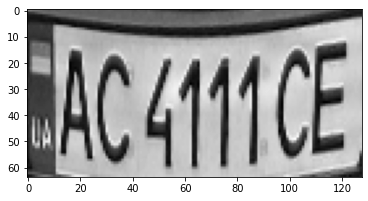

2) the_labels (plate number): AC4111CE is encoded as [10, 12, 4, 1, 1, 1, 12, 13]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu_ua_2004_2015 (Inpu [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu_ua_2004_2015[0][0]  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________

In [6]:
# Train with aug
ocrTextDetector = eu_ua_2004_2015()
ocrTextDetector.EPOCHS = 1

model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

model = ocrTextDetector.train(load_last_weights=True)

In [13]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 KA5517CK
True: 			 KA5517CA

Predicted: 		 CE0001M
True: 			 CE0001MM

Predicted: 		 KA3616AC
True: 			 KA3616AE

Predicted: 		 CA3827T
True: 			 CA3827TT

Predicted: 		 AI7937CP
True: 			 AI7907CP

Predicted: 		 AC2846AP
True: 			 AC2046AP

Predicted: 		 BA1033CA
True: 			 AM1031CA

Predicted: 		 AO7026BO
True: 			 AC7026BO

Predicted: 		 AA5557M
True: 			 AA5557MM

Predicted: 		 AA6935AM
True: 			 AA6935TX

Predicted: 		 AI4637HB
True: 			 AI4637HE
Test processing time: 0.7652502059936523 seconds
acc: 0.9865689865689866


In [11]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ua_2020_08_21_tensorflow_v2.h5
